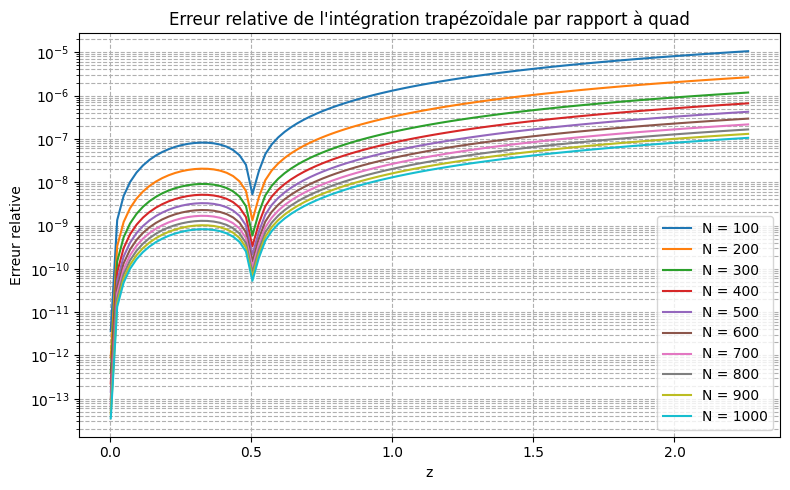

In [6]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

H0 = 70.0
omega_m = 0.3

def H_LCDM(z, H0, omega_m):
    return H0 * np.sqrt(omega_m * (1 + z)**3 + (1 - omega_m))

def inv_H_LCDM(z, H0, omega_m):
    return 1.0 / H_LCDM(z, H0, omega_m)

def integral_trapezoid(func, a, b, N, H0, omega_m):
    h = (b - a) / N
    result = 0.5 * (func(a, H0, omega_m) + func(b, H0, omega_m))
    for i in range(1, N):
        result += func(a + i * h, H0, omega_m)
    return result * h

z_vals = np.linspace(0.00122, 2.26130, 100)

plt.figure(figsize=(8,5))

for N in [100 * i for i in range(1,11)]:
    relative_errors = []
    for z in z_vals:
        exact, _ = quad(lambda zp: inv_H_LCDM(zp, H0, omega_m), 0, z)
        approx = integral_trapezoid(inv_H_LCDM, 0, z, N, H0, omega_m)
        rel_err = abs(approx - exact) / exact
        relative_errors.append(rel_err)
    plt.plot(z_vals, relative_errors, label=f"N = {N}")

# Affichage

plt.yscale('log')
plt.xlabel("z")
plt.ylabel("Erreur relative")
plt.title("Erreur relative de l'intégration trapézoïdale par rapport à quad")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()
